In [49]:
import pandas as pd
import numpy as np

In [50]:
file_path = '/content/default of credit card clients.xls'
df = pd.read_excel(file_path, header=1)

In [51]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [53]:
#Renaming Columns
new_column_names = {
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marriage_Status',
    'AGE': 'Age',
    'PAY_0': 'Repay_Sep',
    'PAY_2': 'Repay_Aug',
    'PAY_3': 'Repay_Jul',
    'PAY_4': 'Repay_Jun',
    'PAY_5': 'Repay_May',
    'PAY_6': 'Repay_Apr',
    'BILL_AMT1': 'Bal_Sep',
    'BILL_AMT2': 'Bal_Aug',
    'BILL_AMT3': 'Bal_Jul',
    'BILL_AMT4': 'Bal_Jun',
    'BILL_AMT5': 'Bal_May',
    'BILL_AMT6': 'Bal_Apr',
    'PAY_AMT1': 'Pay_Sep',
    'PAY_AMT2': 'Pay_Aug',
    'PAY_AMT3': 'Pay_Jul',
    'PAY_AMT4': 'Pay_Jun',
    'PAY_AMT5': 'Pay_May',
    'PAY_AMT6': 'Pay_Apr',
    'default payment next month': 'Default',
}

df.rename(columns=new_column_names, inplace=True)



In [54]:
df

,ID,Credit_Limit,Gender,Education,Marriage_Status,Age,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,...,Bal_Jun,Bal_May,Bal_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [55]:
import matplotlib.pyplot as plt

In [56]:
#Drop unnecessary columns
df.drop(['ID'], axis=1, inplace=True)

In [57]:
df

,Credit_Limit,Gender,Education,Marriage_Status,Age,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,Repay_May,...,Bal_Jun,Bal_May,Bal_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [58]:
df['Gender'].replace(to_replace=['1', '2'], value=['male', 'female'], inplace=True)
df['Education'].replace(to_replace=['1', '2', '3', '4', '6', '0'], value=['graduate', 'university', 'highschool', 'other', 'other', 'other'], inplace=True)
df['Marriage_Status'].replace(to_replace=['1', '2', '3', '0'], value=['married', 'single', 'other', 'other'], inplace=True)


In [59]:
repay_months = ['Repay_Sep', 'Repay_Aug', 'Repay_May',
                  'Repay_Jun', 'Repay_Jul', 'Repay_Apr']

for month in repay_months:
    print(sorted(df[month].unique()))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [60]:
#Changing range values for easier processing
old_range = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
new_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for month in repay_months:
    df[month].replace(to_replace=old_range,
                      value=new_range,
                      inplace=True)

In [61]:
df

,Credit_Limit,Gender,Education,Marriage_Status,Age,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,Repay_May,...,Bal_Jun,Bal_May,Bal_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default
0,20000,2,2,1,24,4,4,1,1,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,1,4,2,2,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,2,2,2,2,2,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,2,2,2,2,2,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,1,2,1,2,2,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,2,2,2,2,2,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,1,1,1,1,2,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,6,5,4,1,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,3,1,2,2,2,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [62]:
import os

In [63]:
os.makedirs('/content/Classification_Credit_Cards/web_app', exist_ok=True)
os.makedirs('/content/Classification_Credit_Cards/data', exist_ok=True)

In [64]:
csv_path = '/content/Classification_Credit_Cards/data/df.csv'
df.to_csv(csv_path, index=False)

In [65]:
import pickle

pickle_path = '/content/Classification_Credit_Cards/web_app/df.pickle'
with open(pickle_path, 'wb') as to_write:
    pickle.dump(df, to_write)

In [66]:
df.columns

Index(['Credit_Limit', 'Gender', 'Education', 'Marriage_Status', 'Age',
       'Repay_Sep', 'Repay_Aug', 'Repay_Jul', 'Repay_Jun', 'Repay_May',
       'Repay_Apr', 'Bal_Sep', 'Bal_Aug', 'Bal_Jul', 'Bal_Jun', 'Bal_May',
       'Bal_Apr', 'Pay_Sep', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May',
       'Pay_Apr', 'Default'],
      dtype='object')

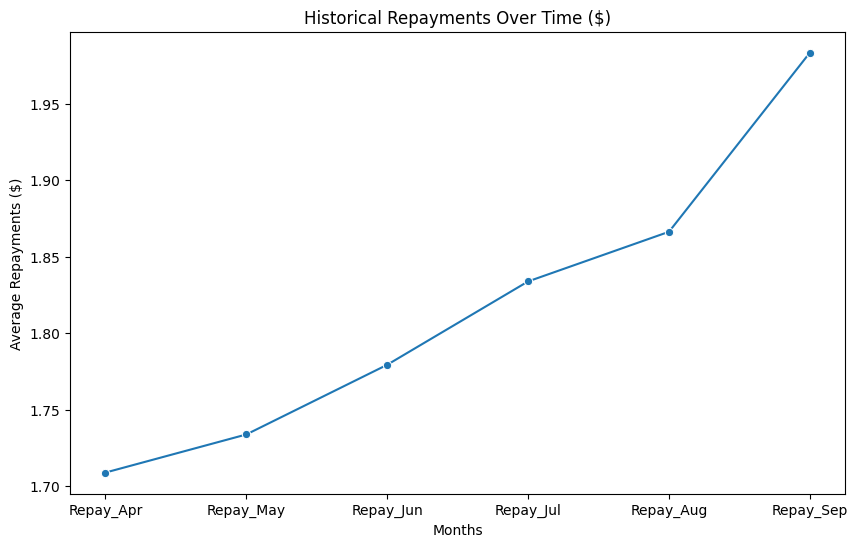

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing Repayments
repay_months = ['Repay_Apr', 'Repay_May', 'Repay_Jun', 'Repay_Jul', 'Repay_Aug', 'Repay_Sep']
avg_repay = []

for month in repay_months:
    avg_repay.append(df[month].mean())

plt.figure(figsize=(10, 6))
sns.lineplot(x=repay_months, y=avg_repay, marker='o')
plt.title('Historical Repayments Over Time ($)')
plt.xlabel('Months')
plt.ylabel('Average Repayments ($)')
plt.show()


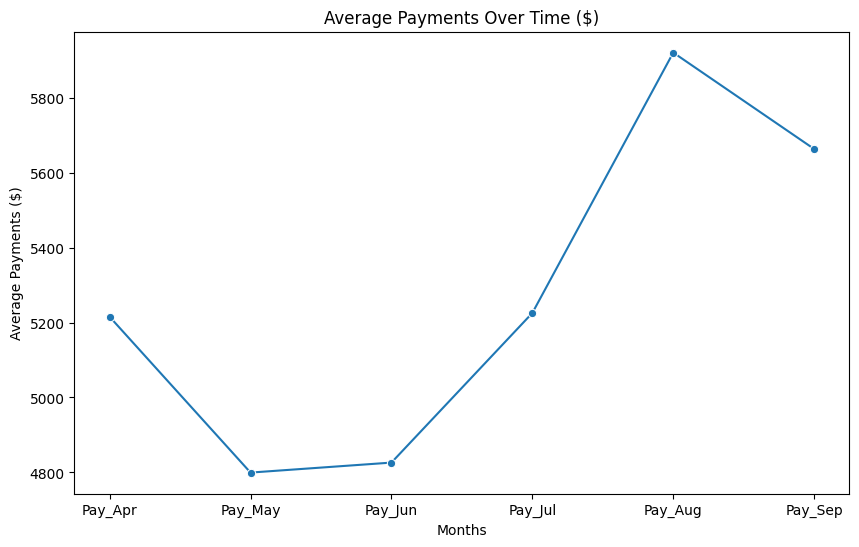

In [68]:
# Visualizing Payments
pay_months = ['Pay_Apr', 'Pay_May', 'Pay_Jun', 'Pay_Jul', 'Pay_Aug', 'Pay_Sep']
avg_pay = []

for month in pay_months:
    avg_pay.append(df[month].mean())

plt.figure(figsize=(10, 6))
sns.lineplot(x=pay_months, y=avg_pay, marker='o')
plt.title('Average Payments Over Time ($)')
plt.xlabel('Months')
plt.ylabel('Average Payments ($)')
plt.show()


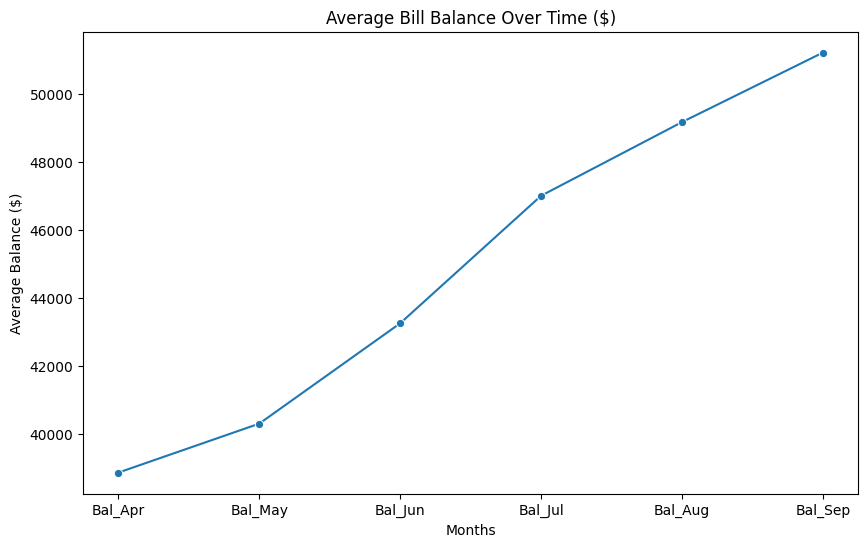

In [69]:
# Visualizing balances
bal_months = ['Bal_Apr', 'Bal_May', 'Bal_Jun', 'Bal_Jul', 'Bal_Aug', 'Bal_Sep']
avg_bal = []

for month in bal_months:
    avg_bal.append(df[month].mean())

plt.figure(figsize=(10, 6))
sns.lineplot(x=bal_months, y=avg_bal, marker='o')
plt.title('Average Bill Balance Over Time ($)')
plt.xlabel('Months')
plt.ylabel('Average Balance ($)')
plt.show()

In [70]:
import plotly.express as px
import plotly.graph_objects as go

# Visualizing Target Distribution using Plotly
fig = go.Figure(data=[go.Histogram(x=df['Default'], nbinsx=2)])

fig.update_layout(
    title='Target Distribution',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        title='Default'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.1,
    width=600,
    height=400
)

fig.show()

In [71]:
# Distribution of limit balance
fig = px.histogram(
    df,
    x='Credit_Limit',
    nbins=100,
    marginal='box',
    title='Credit Limit Amount - Probability Density',
    color_discrete_sequence=['blue'],
    opacity=0.7
)

fig.update_layout(
    xaxis_title='Credit Limit Amount',
    yaxis_title='Count',
    bargap=0.1,
    width=800,
    height=600
)

fig.show()


In [72]:
df['Credit_Limit'].value_counts().head()

Credit_Limit
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: count, dtype: int64

In [73]:
# Box plot for Credit Limit Amount
fig = px.box(
    df,
    x='Gender',
    y='Credit_Limit',
    color='Gender',
    title='Credit Limit Amount by Gender',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Credit Limit Amount',
    width=600,
    height=400
)

fig.show()


In [74]:
fig = px.box(
    df,
    x='Marriage_Status',
    y='Age',
    color='Gender',
    title='Age Distribution by Marriage Status and Gender',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    xaxis_title='Marriage Status',
    yaxis_title='Age',
    width=800,
    height=600
)

fig.show()

In [75]:
df.columns

Index(['Credit_Limit', 'Gender', 'Education', 'Marriage_Status', 'Age',
       'Repay_Sep', 'Repay_Aug', 'Repay_Jul', 'Repay_Jun', 'Repay_May',
       'Repay_Apr', 'Bal_Sep', 'Bal_Aug', 'Bal_Jul', 'Bal_Jun', 'Bal_May',
       'Bal_Apr', 'Pay_Sep', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May',
       'Pay_Apr', 'Default'],
      dtype='object')

In [76]:
column_names = {
    'history_names': {'Repay_Sep', 'Repay_Aug', 'Repay_Jul', 'Repay_Jun', 'Repay_May',
       'Repay_Apr'

    },
    'balance_names': {'Bal_Sep', 'Bal_Aug', 'Bal_Jul', 'Bal_Jun', 'Bal_May',
       'Bal_Apr'

    },
    'payment_names': {
       'Pay_Sep', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May',
       'Pay_Apr'
    }
}


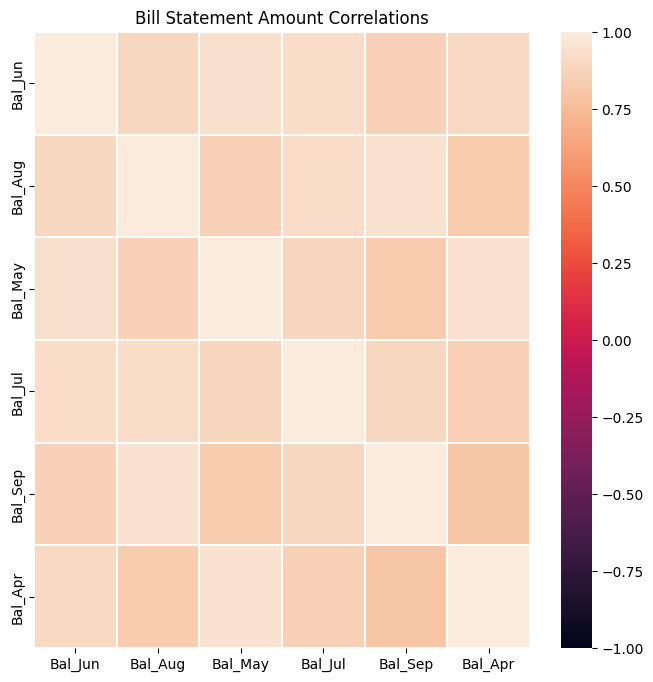

In [77]:
# Correlation Plot
values = list(column_names['balance_names'])

plt.figure(figsize=(8,8))
plt.title('Bill Statement Amount Correlations')
corr = df[values].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, vmin=-1, vmax=1)
plt.show();

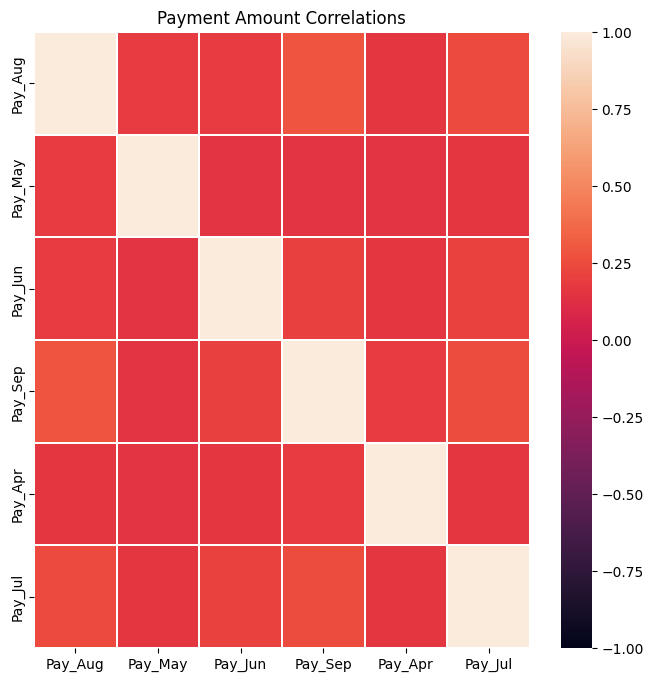

In [78]:
# Amount of Previous Payment
# Correlation Plot
values = list(column_names['payment_names'])

plt.figure(figsize=(8,8))
plt.title('Payment Amount Correlations')
corr = df[values].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, vmin=-1, vmax=1)
plt.show();

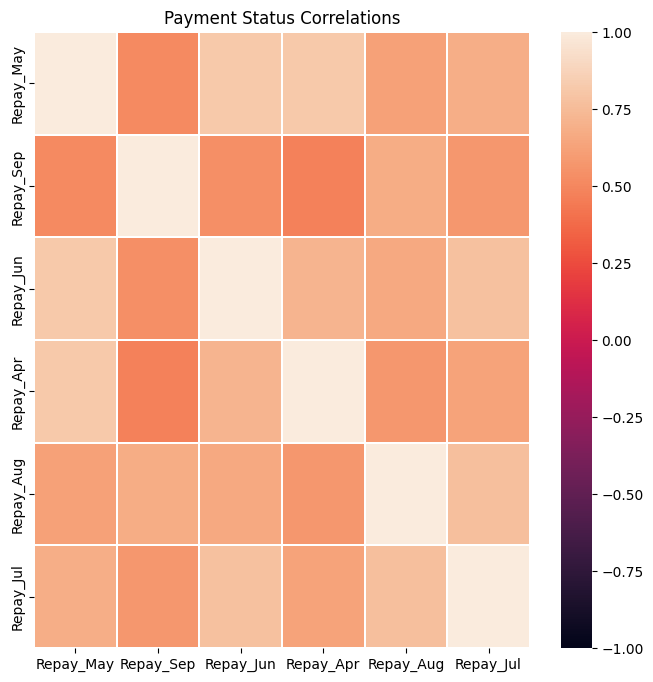

In [79]:
# Payment Status
# Correlation Plot
values = list(column_names['history_names'])

plt.figure(figsize=(8,8))
plt.title('Payment Status Correlations')
corr = df[values].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, vmin=-1, vmax=1)
plt.show();

In [80]:
df.columns

Index(['Credit_Limit', 'Gender', 'Education', 'Marriage_Status', 'Age',
       'Repay_Sep', 'Repay_Aug', 'Repay_Jul', 'Repay_Jun', 'Repay_May',
       'Repay_Apr', 'Bal_Sep', 'Bal_Aug', 'Bal_Jul', 'Bal_Jun', 'Bal_May',
       'Bal_Apr', 'Pay_Sep', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May',
       'Pay_Apr', 'Default'],
      dtype='object')

In [81]:
X = df.loc[:,'Credit_Limit':'Pay_Jun']
y = df['Default']

In [82]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [83]:
categoricals = list(X.select_dtypes('object').columns)
numericals = list(X.select_dtypes('int64').columns)

def encode_cats(categoricals, numericals):
    """
    Takes in a list of categorical columns and a list of numerical columns and returns the dataframe with encoded variables
    """
    ohe = OneHotEncoder(sparse=False, drop='first')
    cat_matrix = ohe.fit_transform(X.loc[:, categoricals])
    X_ohe = pd.DataFrame(cat_matrix,
                         columns=ohe.get_feature_names_out(categoricals), #create meaningful column names
                         index=X.index) #keep the same index values

    return pd.concat([X.loc[:, numericals], X_ohe], axis=1)

In [84]:
X = encode_cats(categoricals, numericals)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [88]:
!pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [93]:
!pip install imbalanced-learn

In [99]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.3 MB/s eta 0:00:00
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [100]:
!pip install xgboost scikit-learn

In [102]:
# Imports from scikit-learn
from sklearn.inspection import permutation_importance
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, fbeta_score, recall_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier,
                              AdaBoostClassifier, BaggingRegressor)
from sklearn.metrics import accuracy_score, make_scorer, log_loss

# Imports from imbalanced-learn


# Other imports
from collections import Counter
import xgboost as xgb


In [103]:
def train_test_val_split(X, y):
    """
    Input: X --> array of features, y --> target array
           set aside for testing.
    Output: Features and target split into train, val and test sets.
            Test size = 20%
            Val size = 25%
            Converted to numpy arrays.
    """
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Split train/validate sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

    # Convert to numpy arrays to help with generate indeces below
    X, y = np.array(X), np.array(y)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [104]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, y)


In [105]:
def scale_data(X_train, X_val, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled

In [106]:
X_train_scaled, X_val_scaled, X_test_scaled = scale_data(X_train, X_val, X_test)

In [107]:
X_train_scaled

array([[ 0.09608114,  0.81234481,  0.18278373, ..., -0.19788067,
        -0.24168083,  2.65595992],
       [ 0.93978655, -1.23100435, -1.07876043, ...,  0.23538143,
         3.96649618,  0.29278204],
       [-0.59422329,  0.81234481,  0.18278373, ..., -0.23004942,
         0.21283116, -0.28608772],
       ...,
       [-1.13112674, -1.23100435, -1.07876043, ..., -0.1214655 ,
        -0.27979126, -0.24799809],
       [-1.05442624,  0.81234481,  0.18278373, ..., -0.23004942,
        -0.20988675, -0.17031377],
       [ 1.09318754,  0.81234481,  0.18278373, ..., -0.01472199,
         0.22965708,  0.03744259]])

In [108]:
def model_score(model_name, model, X_train_scaled, X_val_scaled,
                X_test_scaled, y_train, y_val, y_test, test=False):
    """
    Input: Transformed feature and target sets
    Output: Validation scores. If test=True, includes test scores
    """
    print('Calculating validation score...')

    my_model = model
    my_model.fit(X_train_scaled,y_train)
    print(f'{model_name} accuracy score: {my_model.score(X_val_scaled,y_val):.4}\n')

    if test:
        print("Calculating test score...")
        print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.4}\n')

    return my_model

In [109]:
knn = model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

rf = model_score('RF', RandomForestClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

gbm = model_score('XGBoost', xgb.XGBClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

svc = model_score('SVM', SVC(probability=True),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7bdf97358040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


Calculating validation score...
KNN accuracy score: 0.799

Calculating validation score...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



LogReg accuracy score: 0.815

Calculating validation score...
RF accuracy score: 0.818

Calculating validation score...
XGBoost accuracy score: 0.8157

Calculating validation score...
SVM accuracy score: 0.8188



In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

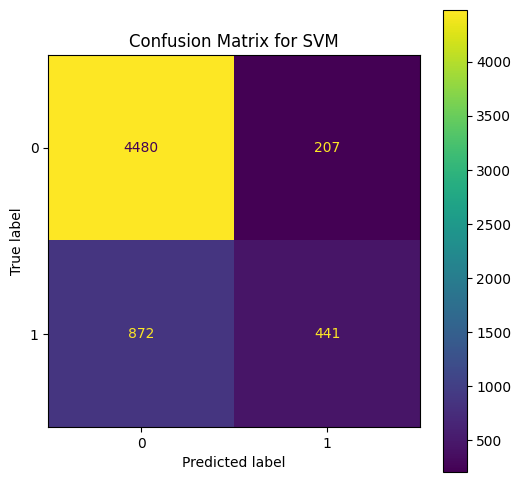

In [122]:
y_pred_svc = svc.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
plt.title('Confusion Matrix for SVM')
plt.show()

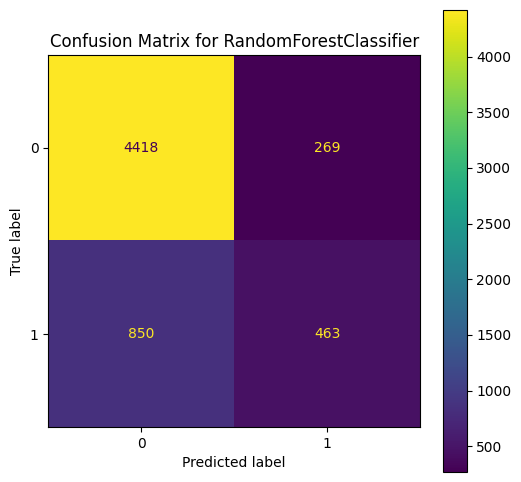

In [120]:
y_pred = rf.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [123]:

y_preds_svc = svc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.68      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



 Recall is a performance metric which attempts to answer the question: What proportion of actual positives was identified correctly? Mathematically, the formula is



TP = True Positive, or a correctly predicted default

FN = False Negative, or an incorrectly predicted non-default

In [ ]:
temp = pd.DataFrame({'Feature': list(X.columns), 'Feature Importance': rf.feature_importances_})
temp = temp.sort_values(by="Feature Importance", ascending=False)

plt.figure(figsize=(7,4))
plt.title('Feature Importance', fontsize=14)
s=sns.barplot(x='Feature', y='Feature Importance using RF ', data=temp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show();

ValueError: Could not interpret value `Feature Importance using SVC ` for `y`. An entry with this name does not appear in `data`.

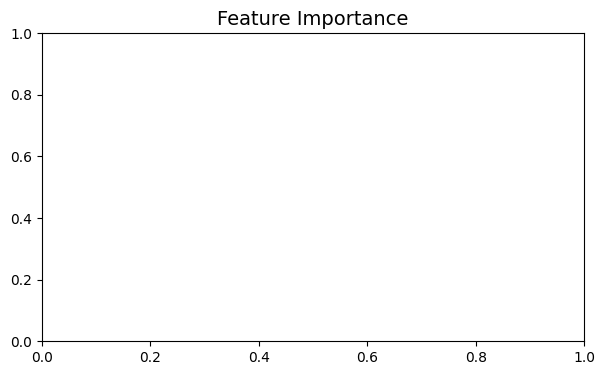

In [127]:
from sklearn.inspection import permutation_importance

# Fit the model (example with svc, assuming it is already fitted)
svc.fit(X_train_scaled, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(svc, X_test_scaled, y_test)

# Create a DataFrame for the feature importance
temp = pd.DataFrame({'Feature': list(X.columns), 'Feature Importance': perm_importance.importances_mean})
temp = temp.sort_values(by="Feature Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(7,4))
plt.title('Feature Importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature Importance using SVC ', data=temp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()


In [129]:
! scikit-learn --version


/bin/bash: line 1: scikit-learn: command not found


In [130]:
!pip install --upgrade scikit-learn


In [140]:
df.describe()

,Credit_Limit,Gender,Education,Marriage_Status,Age,Repay_Sep,Repay_Aug,Repay_Jul,Repay_Jun,Repay_May,...,Bal_Jun,Bal_May,Bal_Apr,Pay_Sep,Pay_Aug,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,1.983300,1.866233,1.833800,1.779333,1.733800,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [142]:

# Feature importance for the best model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print("\nTop 10 Important Features:")
    print(feature_importance.head(20))

# Final prediction
final_prediction = best_model.predict(X_test_scaled)
print("\nFinal Predictions (first 10 samples):")
print(final_prediction[:20])


Top 10 Important Features:
            feature  importance
0      Credit_Limit         236
11          Bal_Sep         234
4               Age         217
22          Pay_Apr         206
18          Pay_Aug         188
20          Pay_Jun         178
19          Pay_Jul         177
17          Pay_Sep         175
16          Bal_Apr         167
12          Bal_Aug         155
21          Pay_May         153
14          Bal_Jun         136
13          Bal_Jul         135
15          Bal_May         134
5         Repay_Sep         100
2         Education          74
3   Marriage_Status          55
10        Repay_Apr          53
7         Repay_Jul          51
6         Repay_Aug          49

Final Predictions (first 10 samples):
[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]


[LightGBM] [Info] Number of positive: 4259, number of negative: 14941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3268
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221823 -> initscore=-1.255075
[LightGBM] [Info] Start training from score -1.255075
[LightGBM] [Info] Number of positive: 4259, number of negative: 14941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3270
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 23
[LightGBM] [Info] [b

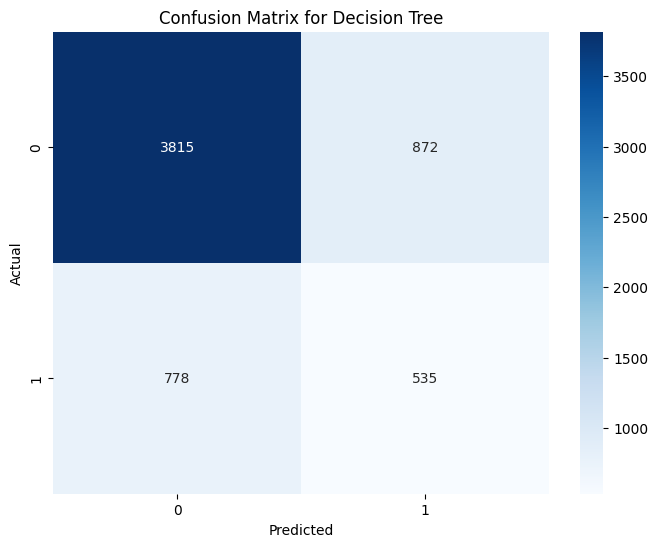

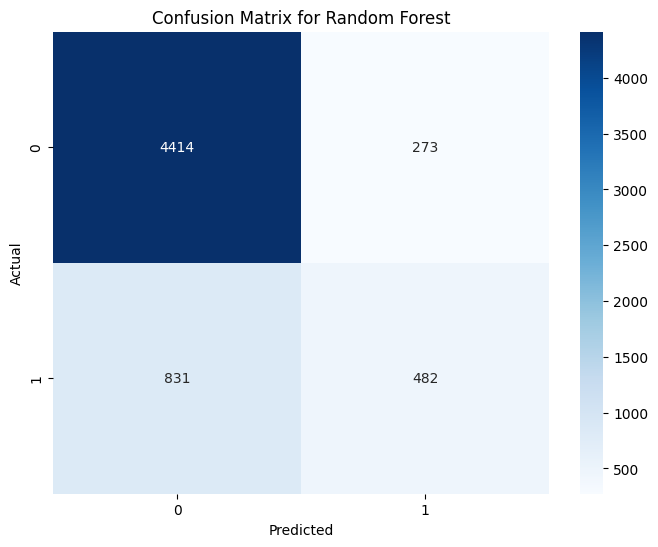

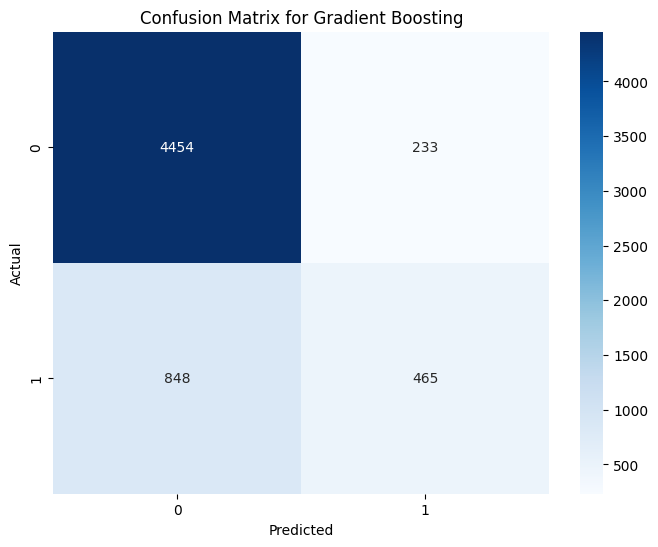

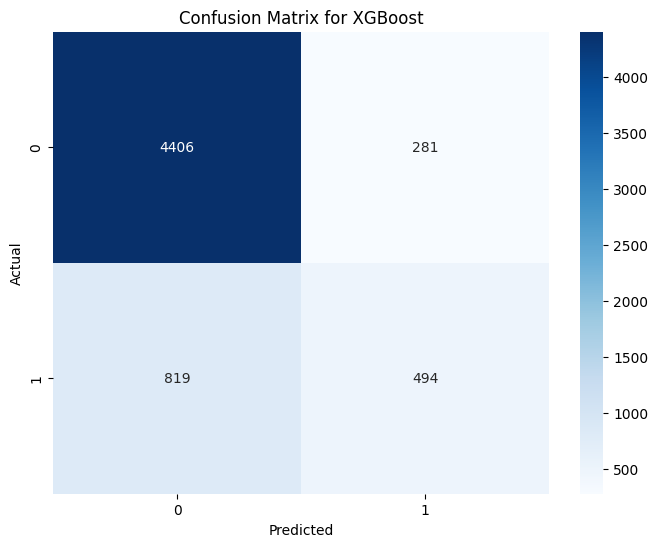

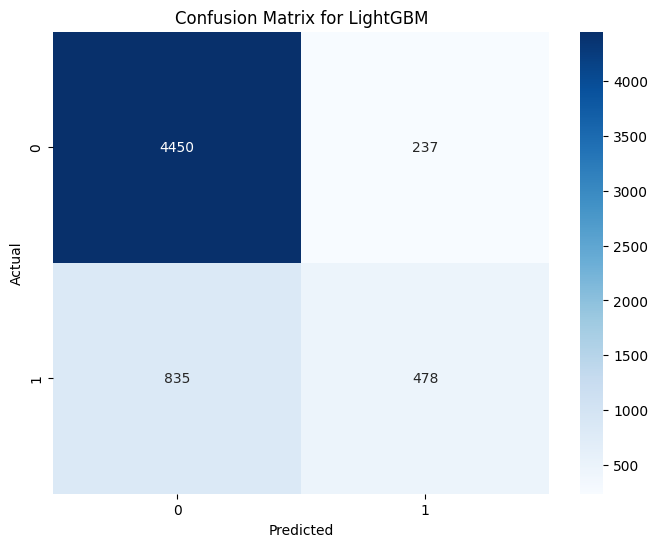


Top 10 Important Features:
         feature  importance
0   Credit_Limit         236
11       Bal_Sep         234
4            Age         217
22       Pay_Apr         206
18       Pay_Aug         188
20       Pay_Jun         178
19       Pay_Jul         177
17       Pay_Sep         175
16       Bal_Apr         167
12       Bal_Aug         155


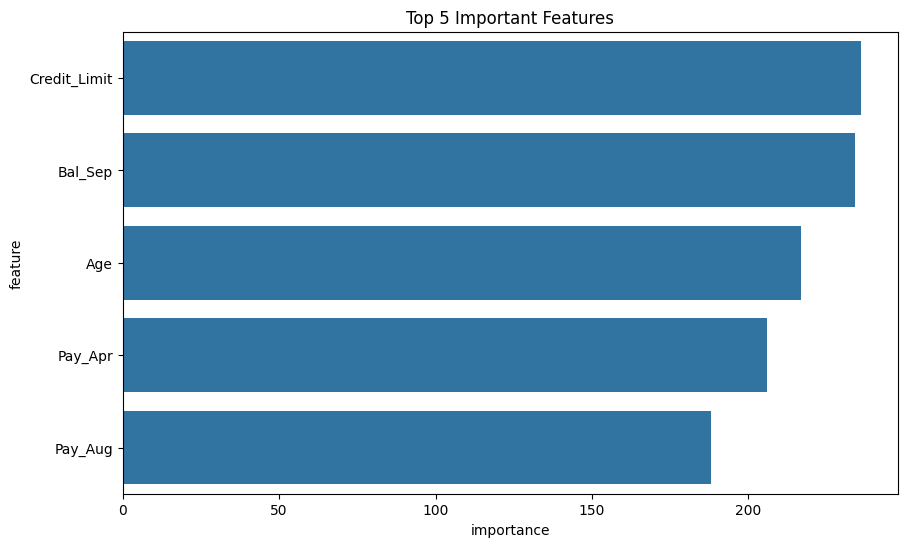

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256

Best Model Performance with Clusters:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Confusion Matrix with Clusters:
[[4450  237]
 [ 835  478]]


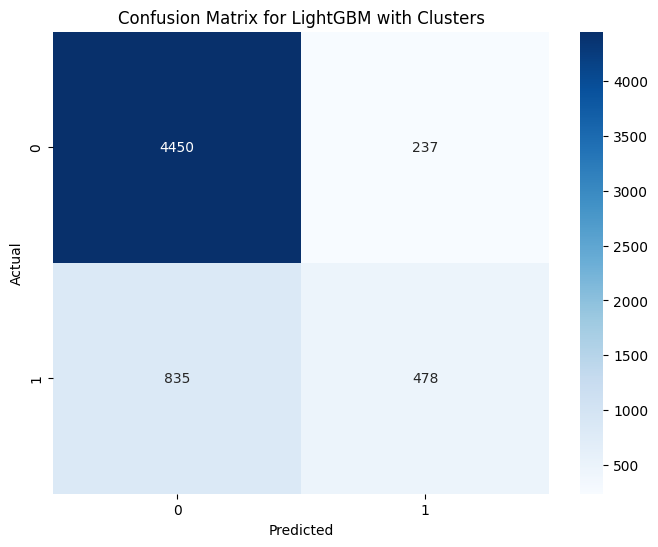


Final Predictions with Clusters (first 10 samples):
[0 0 0 0 0 0 0 0 0 0]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


data = pd.read_csv('/content/Classification_Credit_Cards/data/df.csv')
X = data.drop('Default', axis=1)
y = data['Default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}


results = {}

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')


    model.fit(X_train_scaled, y_train)


    y_pred = model.predict(X_test_scaled)


    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'CV Mean Accuracy': np.mean(cv_scores),
        'CV Std Accuracy': np.std(cv_scores),
        'Test Accuracy': accuracy,
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


best_model_name = max(results, key=lambda x: results[x]['Test Accuracy'])
best_model = models[best_model_name]


for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        if metric != 'Confusion Matrix':
            print(f"  {metric}: {value:.4f}")
    print()

print(f"Best model: {best_model_name}")


y_pred_best = best_model.predict(X_test_scaled)
print("\nBest Model Performance:")
print(classification_report(y_test, y_pred_best))

for name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))


    top_5_features = feature_importance.head(5)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_5_features, x='importance', y='feature')
    plt.title('Top 5 Important Features')
    plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


data['Cluster'] = clusters

X = data.drop(['Default', 'Cluster'], axis=1)
y = data['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)


print("\nBest Model Performance with Clusters:")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix with Clusters:")
print(confusion_matrix(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name} with Clusters')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

final_prediction = best_model.predict(X_test_scaled)
print("\nFinal Predictions with Clusters (first 10 samples):")
print(final_prediction[:10])


In [146]:
!pip install scikit-learn --upgrade

In [148]:
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0


In [149]:
import sklearn
print(sklearn.__version__)


1.2.2
